In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

Lojistik Regresyon modeli oluşturup modelinizin performansını ölçün

In [ ]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [7]:
df=pd.read_csv('cleveland-0_vs_4.csv')
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
1,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
2,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
3,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
4,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0


Num 0 oranı : %7.39
Num 1 oranı : %92.61


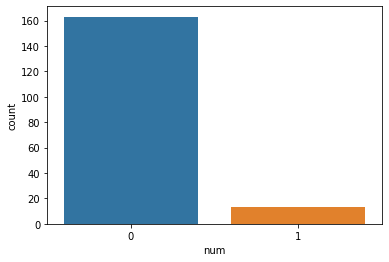

In [13]:
sns.countplot(df.num)
print("Num 0 oranı : %{:.2f}".format(sum(df.num)/len(df.num)*100))
print("Num 1 oranı : %{:.2f}".format((len(df.num)-sum(df.num))/len(df.num)*100))

In [14]:
X = df.drop('num', axis=1)
y = df['num']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9444444444444444
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.70      0.82        10

    accuracy                           0.98       140
   macro avg       0.99      0.85      0.91       140
weighted avg       0.98      0.98      0.98       140

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.33      0.50         3

    accuracy                           0.94        36
   macro avg       0.97      0.67      0.74        36
weighted avg       0.95      0.94      0.93        36



'1' olan sınıfların tahminde çok da başarılı olmadığı görülüyor.

**Örneklem Artırma**

In [16]:
from sklearn.utils import resample
_num0 = df[df.num == 0]
_num1 = df[df.num == 1]

arttirilmis_num1 = resample(_num1,
                                     replace = True,
                                     n_samples = len(_num0),
                                     random_state = 111)

artırılmıs_df = pd.concat([_num0 , arttirilmis_num1])
artırılmıs_df.num.value_counts()

0    163
1    163
Name: num, dtype: int64

Artık iki sınıfında sayısı eşit oldu. Şimdi modelimizi uygulayıp sonuçları görebiliriz.

In [17]:
X = artırılmıs_df.drop('num', axis=1)
y = artırılmıs_df['num']
model_olustur(X,y)

Modelin doğruluk değeri :  1.0
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       130
           1       0.94      1.00      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



**Örneklem Azaltmak**

In [23]:
_num0 = df[df.num == 0]
_num1 = df[df.num == 1]

num1_azaltılmış = resample(_num0,
                                     replace = True,
                                     n_samples = len(_num1),
                                     random_state = 111)

azaltılmış_df = pd.concat([_num1, num1_azaltılmış])
azaltılmış_df.num.value_counts()

1    13
0    13
Name: num, dtype: int64

In [24]:
X = artırılmıs_df.drop('num', axis=1)
y = artırılmıs_df['num']
model_olustur(X,y)

Modelin doğruluk değeri :  1.0
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       130
           1       0.94      1.00      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



**Sentetik örnekler üretmek**

**SMOTE**

In [27]:
from imblearn.over_sampling import SMOTE
y = df.num
X = df.drop('num', axis=1)

oversample = SMOTE()
X_smote, y_smote = sm.fit_sample(X, y)
model_olustur(X_smote, y_smote)

In [36]:
from imblearn.over_sampling import SMOTE
y = df.num
X = df.drop('num', axis=1)

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.9848484848484849
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       130
           1       0.96      1.00      0.98       130

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



In [33]:
from imblearn.over_sampling import ADASYN
y = df.num
X = df.drop('num', axis=1)

oversample = ADASYN()
X_adasyn, y_adasyn= oversample.fit_resample(X, y)
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.9696969696969697
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       130
           1       0.95      1.00      0.97       132

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test veri kümesi
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      0.97      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66

